In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the Refugee Data
#this dataset represents number of refugees that arrived to USA from each country (Oct2015 - sept2016) 
refugee_df = pd.read_csv("./data/Arrival by country of origin for all FY2016 - Sheet1 (1).csv")


# Display the data table for preview
refugee_df.head()

,Country of Origin,Oct 2015,Nov 2015,Dec 2015,Jan 2016,Feb 2016,Mar 2016,Apr 2016,May 2016,Jun 2016,Jul 2016,Aug 2016,Sep 2016
0,Angola,0,0,0,0,0,0,3,0,0,0,0,0
1,Burundi,59,5,25,49,56,68,48,62,85,62,116,59
2,Cameroon,0,0,0,0,0,0,1,2,6,0,2,3
3,Central African Republic,0,14,4,0,0,0,12,4,0,8,206,153
4,Chad,0,0,0,0,0,0,0,1,0,0,0,1


In [3]:
# Check the data types
refugee_df = refugee_df.dropna()
refugee_df.dtypes

Country of Origin    object
Oct 2015              int64
Nov 2015              int64
Dec 2015              int64
Jan 2016              int64
Feb 2016              int64
Mar 2016              int64
Apr 2016              int64
May 2016              int64
Jun 2016              int64
Jul 2016              int64
Aug 2016              int64
Sep 2016              int64
dtype: object

In [4]:
#Names of Countries Studied:
print("country' : ",refugee_df['Country of Origin'].unique())

country' :  ['Angola' 'Burundi' 'Cameroon' 'Central African Republic' 'Chad' 'Congo'
 'Dem. Rep. Congo' 'Eritrea' 'Ethiopia' 'Gabon' 'Guinea' 'Ivory Coast'
 'Kenya' 'Liberia' 'Mali' 'Nigeria' 'Republic of South Sudan' 'Rwanda'
 'Senegal' 'Sierra Leone' 'Somalia' 'Sudan' 'Tanzania' 'Togo' 'Uganda'
 'Zambia' 'Zimbabwe' 'Burma' 'Cambodia' 'China' 'Indonesia' 'Korea, North'
 'Laos' 'Malaysia' 'Thailand' 'Tibet' 'Vietnam' 'Armenia' 'Azerbaijan'
 'Belarus' 'Belgium' 'Croatia' 'Georgia' 'Kazakhstan' 'Kyrgyzstan'
 'Moldova' 'Mongolia' 'Norway' 'Russia' 'Sweden' 'Tajikistan' 'Ukraine'
 'Uzbekistan' 'Colombia' 'Cuba' 'El Salvador' 'Guatemala' 'Honduras'
 'Jamaica' 'Afghanistan' 'Bangladesh' 'Bhutan' 'Egypt' 'India' 'Iran'
 'Iraq' 'Jordan' 'Kuwait' 'Libya' 'Nepal' 'Pakistan' 'Palestine'
 'Saudi Arabia' 'Sri Lanka (Ceylon)' 'Syria' 'Tunisia'
 'United Arab Emirates' 'Yemen']


In [5]:
#import the necessary module
from sklearn import preprocessing

# create the Labelencoder object
le = preprocessing.LabelEncoder()

#convert the categorical columns into numeric
refugee_df['Country of Origin'] = le.fit_transform(refugee_df['Country of Origin'])

#display the initial records
refugee_df.head()

,Country of Origin,Oct 2015,Nov 2015,Dec 2015,Jan 2016,Feb 2016,Mar 2016,Apr 2016,May 2016,Jun 2016,Jul 2016,Aug 2016,Sep 2016
0,1,0,0,0,0,0,0,3,0,0,0,0,0
1,9,59,5,25,49,56,68,48,62,85,62,116,59
2,11,0,0,0,0,0,0,1,2,6,0,2,3
3,12,0,14,4,0,0,0,12,4,0,8,206,153
4,13,0,0,0,0,0,0,0,1,0,0,0,1


In [6]:
#select columns other than Sep 2016
cols = [col for col in refugee_df.columns if col not in ['Sep 2016']]

#Assign them to X
X = refugee_df[cols]

#assigning 'Sep 2016' column as target
target = refugee_df['Sep 2016']

X.head(n=2)

,Country of Origin,Oct 2015,Nov 2015,Dec 2015,Jan 2016,Feb 2016,Mar 2016,Apr 2016,May 2016,Jun 2016,Jul 2016,Aug 2016
0,1,0,0,0,0,0,0,3,0,0,0,0
1,9,59,5,25,49,56,68,48,62,85,62,116


In [7]:
# Create a linear regression model
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
# Split the dataset into training and testing datasets
X_train, X_test, Y_train, Y_test = \
    train_test_split(X, target, test_size=0.33, random_state=42)

In [9]:
# Fit (train) the model with the training data
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
# Print the intercept coefficient
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 7.623527069995731


In [11]:
# Number of coefficients: 
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 12


In [12]:
# Create a dataframe with the features and coefficients
fc_df = pd.DataFrame(list(zip(X.columns, lm.coef_)), columns=['features', 'coefficients'])
fc_df

,features,coefficients
0,Country of Origin,-0.221957
1,Oct 2015,3.288955
2,Nov 2015,-2.163658
3,Dec 2015,-0.123105
4,Jan 2016,0.232654
5,Feb 2016,-3.803035
6,Mar 2016,1.601785
7,Apr 2016,0.628639
8,May 2016,-0.738077
9,Jun 2016,-1.954432


In [13]:
# Use the test data to create predictions and show the first 5
y_pred = lm.predict(X_test)
y_pred[0:5]

array([ -2.8651633 ,   9.28748826, -10.01844558,   6.72659502,
       -13.68728677])

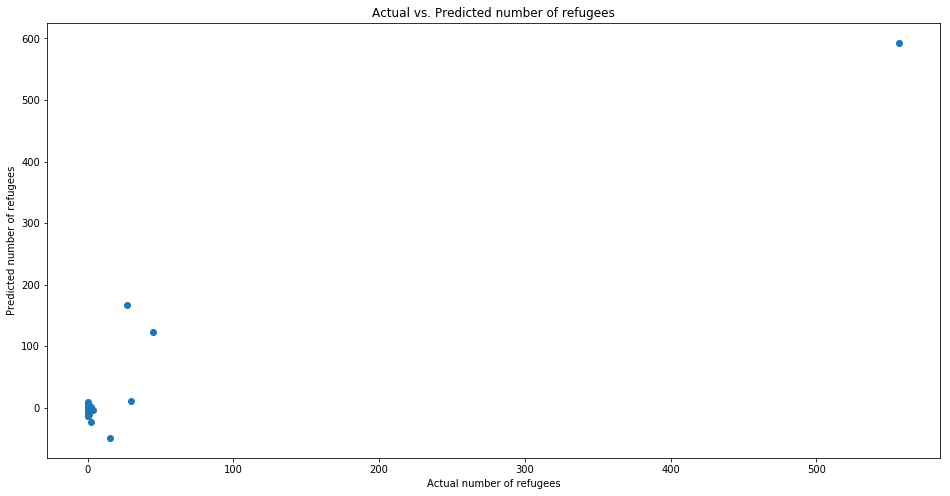

In [14]:
# Create a plot to compare actual number of refugees (Y_test) and the predicted number of refugees (pred_test)
fig = plt.figure(figsize=(16,8))
plt.scatter(Y_test, y_pred)
plt.xlabel("Actual number of refugees")
plt.ylabel("Predicted number of refugees")
plt.title("Actual vs. Predicted number of refugees")
plt.show()

In [15]:
# Get the Mean Squared Error (MSE) for all predictions
mse = mean_squared_error(Y_train, lm.predict(X_train))
print("MSE Training Data: {}".format(mse))

MSE Training Data: 2465.8541511030858


In [16]:
# Get the MSE for the test data
print("MSE Test Data: {}".format(mean_squared_error(Y_test, lm.predict(X_test))))

MSE Test Data: 1279.306312081451


In [17]:
# Get the MSE for a single feature for comparison
lm2 = LinearRegression()
lm2.fit(X[['Nov 2015']], target)

mse2 = mean_squared_error(target, lm2.predict(X[['Nov 2015']]))
print("MSE All Data Single Feature: {}".format(mse2))

MSE All Data Single Feature: 79292.71847029547


In [18]:
#Variance Score
print("Variance Score: %.2f" % r2_score(Y_test, y_pred))

Variance Score: 0.89


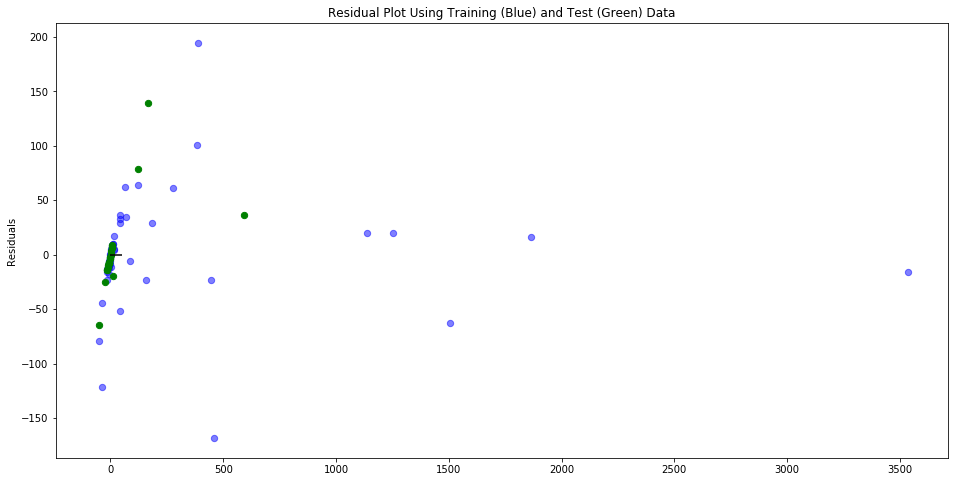

In [19]:
# Create a residual plot
fig = plt.figure(figsize=(16,8))
plt.scatter(lm.predict(X_train), lm.predict(X_train) - Y_train, c='b', s=40, alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - Y_test, c='g', s=40)
plt.hlines(y=0, xmin=0, xmax=50)
plt.ylabel("Residuals")
plt.title("Residual Plot Using Training (Blue) and Test (Green) Data")
plt.show()


In [20]:
print(f"Training Data Score: {lm.score(X_train, Y_train)}")
print(f"Testing Data Score: {lm.score(X_test, Y_test)}")

Training Data Score: 0.993378571123973
Testing Data Score: 0.8876301495356083


In [21]:
#logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
X_train, X_test, Y_train, Y_test = train_test_split(X, target, test_size=0.33, random_state=42)


In [22]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
y_pred = lr.predict(X_test)

In [24]:
print(f"Training Data Score: {lr.score(X_train, Y_train)}")
print(f"Testing Data Score: {lr.score(X_test, Y_test)}")

Training Data Score: 0.9615384615384616
Testing Data Score: 0.4230769230769231


In [25]:

predictions = lr.predict(X_test)
predictions_df = pd.DataFrame({"Prediction": predictions, "Actual": Y_test})
predictions_df.head()


,Prediction,Actual
33,6,0
0,0,0
34,0,1
12,0,0
10,0,0


In [26]:
predictions_df['Prediction'].unique()

array([  6,   0,  11,   1, 218, 285,  10,   3,  59], dtype=int64)

In [27]:
len(predictions_df)

26

In [28]:
print("Accuracy Score: %.2f" % accuracy_score(Y_test, y_pred))

Accuracy Score: 0.42


In [29]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred)
cnf_matrix

array([[11,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,

Text(0.5,257.44,'Predicted label')

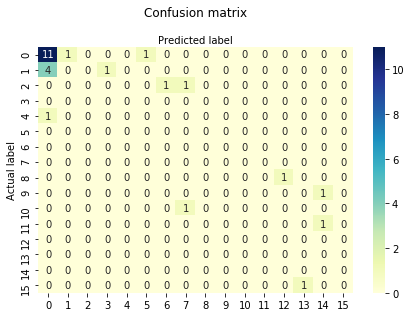

In [30]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [31]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.4230769230769231


In [32]:
#Lasso Regression with scikit-learn
#This section creates and measures a LASSO regression model using sklearn.

from sklearn.linear_model import Lasso

In [33]:
# Create an instance of a Lasso Regression model
model = Lasso(alpha=0.3, normalize=True)
model.fit(X_train, Y_train)

Lasso(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [34]:
# Print the intercept coefficient
print('Estimated intercept coefficient: {}'.format(model.intercept_))

Estimated intercept coefficient: 21.59961436706385


In [35]:
# Create a dataframe with the features and coefficients
fc_df = pd.DataFrame(list(zip(X.columns, model.coef_)), columns=['features', 'coefficients'])
fc_df.head()

,features,coefficients
0,Country of Origin,-0.473905
1,Oct 2015,0.514802
2,Nov 2015,-0.000000
3,Dec 2015,0.000000
4,Jan 2016,0.271806


In [36]:
len(fc_df)

12

In [37]:
y_pred = model.predict(X_test)

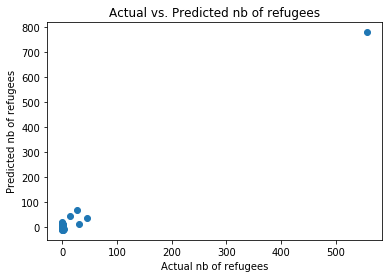

In [38]:
# Create a plot to compare actual nb of refugees (Y_test) and the predicted nb of refugees (pred_test)
#fig = plt.figure(figsize=(20,10))
plt.scatter(Y_test, y_pred)
plt.xlabel("Actual nb of refugees")
plt.ylabel("Predicted nb of refugees")
plt.title("Actual vs. Predicted nb of refugees")
plt.show()

In [39]:
print(f"Training Data Score: {model.score(X_train, Y_train)}")
print(f"Testing Data Score: {model.score(X_test, Y_test)}")

Training Data Score: 0.9889683222793142
Testing Data Score: 0.8173524530239026


In [40]:
# Get the Mean Squared Error (MSE) for all predictions
mse = mean_squared_error(Y_train, model.predict(X_train))
print("MSE Training Data: {}".format(mse))

MSE Training Data: 4108.253491881746


In [41]:
# Get the MSE for the test data
print("MSE Test Data: {}".format(mean_squared_error(Y_test, model.predict(X_test))))

MSE Test Data: 2079.4026045870623


In [42]:
print("Variance Score: %.2f" % r2_score(Y_test, y_pred))

Variance Score: 0.82


In [43]:
#Decision Tree
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)
clf.score(X_test, Y_test) 

0.5384615384615384

In [44]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [45]:
naive_model = GaussianNB()

naive_model.fit(X_train,Y_train)

print(f"Training Data Score: {naive_model.score(X_train, Y_train)}")
print(f"Testing Data Score: {naive_model.score(X_test, Y_test)}")

Training Data Score: 0.9615384615384616
Testing Data Score: 0.38461538461538464


In [46]:
# Create predictions
predictions = naive_model.predict(X_test)
print(predictions)

[ 6  0  0  0  0  1  0  0  0  1 10  0  0  4  0 12  1  0  0  6  0 10  0 10
  0 10]


In [47]:
print("Accuracy Score: %.2f" % accuracy_score(Y_test, predictions))

Accuracy Score: 0.38


In [48]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, Y_train)
rf.score(X_train, Y_train)

1.0

In [49]:
rf.score(X_test, Y_test)

0.5

In [50]:
#Support Vector Machine

from sklearn.svm import SVC 
# using X_train, X_test, Y_train, Y_test
svm_space = SVC(kernel='rbf')
svm_space.fit(X_train, Y_train)
y_predict = svm_space.predict(X_test)


In [51]:
accuracy = svm_space.score(X_test, Y_test)
print(accuracy)

0.5


In [52]:
svm_space.score(X_train, Y_train)

0.9807692307692307

In [53]:
#K Nearest Neighbor
len(X_train)

52

In [54]:
# KNN 
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
train_score = knn.score(X_train, Y_train)
print(train_score)

0.4423076923076923


In [55]:
test_score = knn.score(X_test, Y_test)
print(test_score)

0.5


In [56]:
#Neural Networks with Scikit-Learn
#------------------------------------
from sklearn.neural_network import MLPClassifier 
X_train, X_test, Y_train, Y_test = train_test_split(X, target, random_state=42)

neural_network = MLPClassifier(hidden_layer_sizes=(64,16,8), solver="adam", random_state=1)
neural_network.fit(X_train, Y_train)

print(f"Training Data Score: {neural_network.score(X_train, Y_train)}")
print(f"Testing Data Score: {neural_network.score(X_test, Y_test)}")


Training Data Score: 0.4827586206896552
Testing Data Score: 0.55


C:\Users\mariam\Anaconda3\envs\PythonData\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [57]:
#Elastic Net

from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=1, l1_ratio=0.5, normalize=False)
model.fit(X_train, Y_train)

C:\Users\mariam\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ElasticNet(alpha=1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [58]:
print(f"Training Data Score: {model.score(X_train, Y_train)}")
print(f"Testing Data Score: {model.score(X_test, Y_test)}")


Training Data Score: 0.9928961721221073
Testing Data Score: 0.7165258489470192


In [59]:
#K-Means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)

# Fit the model to the data
kmeans.fit(X_train)

# Use the data to predict the clusters
# save the predictions as `predicted_clusters`
predicted_clusters = kmeans.predict(X_train)


In [60]:
print(f"Training Data Score: {kmeans.score(X_train, Y_train)}")
print(f"Testing Data Score: {kmeans.score(X_test, Y_test)}")


Training Data Score: -2186007.083333334
Testing Data Score: -1474133.015625
